# AI 기반 온라인 소비패턴 예측하기

## <Data 전처리>

In [1]:
import numpy as np 

### 파일 불러오기

In [2]:
import pandas as pd
data_food = pd.read_csv('data/식품.csv')
data_beauty = pd.read_csv('data/미용.csv')
data_fashion = pd.read_csv('data/패션.csv')
data_life = pd.read_csv('data/생활.csv')
data_food=data_food.drop(['Unnamed: 6'],axis=1)
data_food.head()

,날짜,분야,검색어,검색횟수,나이,성별
0,2019-06-01,식품,영양제,8.50328,10대,여
1,2019-06-02,식품,영양제,11.75250,10대,여
2,2019-06-03,식품,영양제,9.71310,10대,여
3,2019-06-04,식품,영양제,7.77739,10대,여
4,2019-06-05,식품,영양제,7.70826,10대,여


In [3]:
data_beauty.head()

,날짜,분야,검색어,검색횟수,나이,성별
0,2019-06-01,미용,기초케어,36.66666,10대,여
1,2019-06-02,미용,기초케어,34.66666,10대,여
2,2019-06-03,미용,기초케어,20.00000,10대,여
3,2019-06-04,미용,기초케어,21.00000,10대,여
4,2019-06-05,미용,기초케어,18.66666,10대,여


In [4]:
data_fashion.head()

,날짜,분야,검색어,검색횟수,나이,성별
0,2019-06-01,패션의류,니트,0.32542,10대,여
1,2019-06-02,패션의류,니트,0.32542,10대,여
2,2019-06-03,패션의류,니트,0.24885,10대,여
3,2019-06-04,패션의류,니트,0.28713,10대,여
4,2019-06-05,패션의류,니트,0.30627,10대,여


In [5]:
data_life.head()

,날짜,분야,검색어,검색횟수,나이,성별
0,2019-06-01,생활건강,마스크,0.33529,10대,남
1,2019-06-02,생활건강,마스크,0.40372,10대,남
2,2019-06-03,생활건강,마스크,0.22581,10대,남
3,2019-06-04,생활건강,마스크,0.25318,10대,남
4,2019-06-05,생활건강,마스크,0.20528,10대,남


In [7]:
data_weather = pd.read_csv('data/날씨.csv')
data_weather.head()

,지점,지점명,일시,평균기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),평균 현지기압(hPa),합계 일조시간(hr),합계 일사량(MJ/m2),일 최심적설(cm),평균 지면온도(°C),안개 계속시간(hr)
0,108,서울,2019-06-01,18.9,NaN,1.9,60.5,1000.1,9.4,21.1,NaN,24.8,NaN
1,108,서울,2019-06-02,21.1,NaN,1.7,42.1,997.6,13,26.48,NaN,27.8,NaN
2,108,서울,2019-06-03,23.1,NaN,1.8,42.9,997.9,12.3,25.57,NaN,30.1,NaN
3,108,서울,2019-06-04,22.6,NaN,2.2,56.4,999.3,12.8,26.21,NaN,29.9,NaN
4,108,서울,2019-06-05,23,NaN,1.8,63.8,1001.8,8.9,24.14,NaN,31.4,NaN


### 불필요한 열 삭제

In [8]:
data_weather=data_weather.drop(['지점','평균 현지기압(hPa)','합계 일사량(MJ/m2)','평균 지면온도(°C)','안개 계속시간(hr)'],axis=1)
data_weather.head()

,지점명,일시,평균기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),합계 일조시간(hr),일 최심적설(cm)
0,서울,2019-06-01,18.9,NaN,1.9,60.5,9.4,NaN
1,서울,2019-06-02,21.1,NaN,1.7,42.1,13,NaN
2,서울,2019-06-03,23.1,NaN,1.8,42.9,12.3,NaN
3,서울,2019-06-04,22.6,NaN,2.2,56.4,12.8,NaN
4,서울,2019-06-05,23,NaN,1.8,63.8,8.9,NaN


### Column 명 바꾸기

In [9]:
data_weather.rename(columns={'일시':'날짜','평균기온(°C)':'평균기온', '일강수량(mm)':'일강수량', '평균 풍속(m/s)':'평균풍속','평균 상대습도(%)':'평균습도','합계 일조시간(hr)':'일조시간','일 최심적설(cm)':'최심적설'}, inplace=True)
data_weather.head()

,지점명,날짜,평균기온,일강수량,평균풍속,평균습도,일조시간,최심적설
0,서울,2019-06-01,18.9,NaN,1.9,60.5,9.4,NaN
1,서울,2019-06-02,21.1,NaN,1.7,42.1,13,NaN
2,서울,2019-06-03,23.1,NaN,1.8,42.9,12.3,NaN
3,서울,2019-06-04,22.6,NaN,2.2,56.4,12.8,NaN
4,서울,2019-06-05,23,NaN,1.8,63.8,8.9,NaN


In [10]:
data_weather.isnull().sum()

지점명        1
날짜         1
평균기온       5
일강수량    3902
평균풍속      14
평균습도       5
일조시간      18
최심적설    6441
dtype: int64

### 강수량/최심적설 Nan 값 = 0, 기온/풍속/습도/일조 = bfill

In [11]:
data_weather['일강수량'].fillna(0,inplace=True)
data_weather['최심적설'].fillna(0,inplace=True)

In [12]:
data_weather.isnull().sum()

지점명      1
날짜       1
평균기온     5
일강수량     0
평균풍속    14
평균습도     5
일조시간    18
최심적설     0
dtype: int64

In [13]:
data_weather['평균기온'].fillna(method='bfill', inplace=True)
data_weather['평균풍속'].fillna(method='bfill', inplace=True)
data_weather['평균습도'].fillna(method='bfill', inplace=True)
data_weather['일조시간'].fillna(method='bfill', inplace=True)
data_weather.isnull().sum()

지점명     1
날짜      1
평균기온    0
일강수량    0
평균풍속    0
평균습도    0
일조시간    0
최심적설    0
dtype: int64

In [14]:
data_weather.dropna(axis=0, inplace=True)
data_weather.isnull().sum()

지점명     0
날짜      0
평균기온    0
일강수량    0
평균풍속    0
평균습도    0
일조시간    0
최심적설    0
dtype: int64

In [15]:
idx_nm_1 = data_weather[data_weather['지점명']=='지점명'].index
data_weather.drop(idx_nm_1, inplace=True)

In [16]:
data_weather.head()

,지점명,날짜,평균기온,일강수량,평균풍속,평균습도,일조시간,최심적설
0,서울,2019-06-01,18.9,0,1.9,60.5,9.4,0
1,서울,2019-06-02,21.1,0,1.7,42.1,13,0
2,서울,2019-06-03,23.1,0,1.8,42.9,12.3,0
3,서울,2019-06-04,22.6,0,2.2,56.4,12.8,0
4,서울,2019-06-05,23,0,1.8,63.8,8.9,0


### 날씨 요인에 있는 지역에 각각 인구 가중치를 부여하여 하나로 나타내기

In [17]:
data_weather.loc[data_weather['지점명']=='고창','지점명']='전북'
data_weather.loc[data_weather['지점명']=='광주','지점명']='전남'
data_weather.loc[data_weather['지점명']=='대구','지점명']='경북'
data_weather.loc[data_weather['지점명']=='대전','지점명']='충남'
data_weather.loc[data_weather['지점명']=='부산','지점명']='경남'
data_weather.loc[data_weather['지점명']=='서울','지점명']='수도권'
data_weather.loc[data_weather['지점명']=='원주','지점명']='강원'
data_weather.loc[data_weather['지점명']=='청주','지점명']='충북'

data_weather['가중치']=0
data_weather.loc[data_weather['지점명']=='수도권','가중치']=0.5
data_weather.loc[data_weather['지점명']=='강원','가중치']=0.03
data_weather.loc[data_weather['지점명']=='경북','가중치']=0.1
data_weather.loc[data_weather['지점명']=='경남','가중치']=0.15
data_weather.loc[data_weather['지점명']=='전남','가중치']=0.06
data_weather.loc[data_weather['지점명']=='전북','가중치']=0.04
data_weather.loc[data_weather['지점명']=='충남','가중치']=0.08
data_weather.loc[data_weather['지점명']=='충북','가중치']=0.03
data_weather.loc[data_weather['지점명']=='제주','가중치']=0.01

In [18]:
data_weather[['평균기온','일강수량','평균풍속','평균습도','일조시간','최심적설']]=data_weather[['평균기온','일강수량','평균풍속','평균습도','일조시간','최심적설']].apply(pd.to_numeric)

In [19]:
grouped = data_weather.groupby('날짜')
weighted_avg_fun = lambda data_weather:np.average(data_weather['평균기온'],weights=data_weather['가중치'])
weighted_평균기온 = grouped.apply(weighted_avg_fun)
weighted_avg_fun = lambda data_weather:np.average(data_weather['일강수량'],weights=data_weather['가중치'])
weighted_일강수량 = grouped.apply(weighted_avg_fun)
weighted_avg_fun = lambda data_weather:np.average(data_weather['평균풍속'],weights=data_weather['가중치'])
weighted_평균풍속 = grouped.apply(weighted_avg_fun)
weighted_avg_fun = lambda data_weather:np.average(data_weather['평균습도'],weights=data_weather['가중치'])
weighted_평균습도 = grouped.apply(weighted_avg_fun)
weighted_avg_fun = lambda data_weather:np.average(data_weather['일조시간'],weights=data_weather['가중치'])
weighted_일조시간 = grouped.apply(weighted_avg_fun)
weighted_avg_fun = lambda data_weather:np.average(data_weather['최심적설'],weights=data_weather['가중치'])
weighted_최심적설 = grouped.apply(weighted_avg_fun)
weighted_weather = weighted_평균기온.to_frame()
weighted_weather.columns=['weighted_평균기온']
weighted_weather['weighted_일강수량']=weighted_일강수량
weighted_weather['weighted_평균풍속']=weighted_평균풍속
weighted_weather['weighted_평균습도']=weighted_평균습도
weighted_weather['weighted_일조시간']=weighted_일조시간
weighted_weather['weighted_최심적설']=weighted_최심적설

In [20]:
weighted_weather.head()

,weighted_평균기온,weighted_일강수량,weighted_평균풍속,weighted_평균습도,weighted_일조시간,weighted_최심적설
날짜,,,,,,
2019-06-01,19.297,0.0,1.873,60.863,9.566,0.0
2019-06-02,21.342,0.0,1.679,47.685,12.483,0.0
2019-06-03,22.997,0.0,1.764,46.959,12.290,0.0
2019-06-04,23.428,0.0,1.972,56.793,12.538,0.0
2019-06-05,23.735,0.0,1.808,61.620,10.572,0.0


In [21]:
weighted_weather.describe()

,weighted_평균기온,weighted_일강수량,weighted_평균풍속,weighted_평균습도,weighted_일조시간,weighted_최심적설
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,14.076149,4.050614,2.246261,64.705720,6.431343,0.070824
std,9.268990,10.438765,0.687813,13.441547,3.536707,0.368999
min,-12.729000,0.000000,1.069000,33.991000,0.000000,0.000000
25%,6.817000,0.000000,1.763000,54.263000,3.550500,0.000000
50%,14.489000,0.030000,2.090000,64.630000,7.223000,0.000000
75%,22.448000,1.942500,2.609500,74.892500,9.254500,0.000000
max,30.348000,96.255000,5.713000,96.432000,12.875000,3.782000


### 날짜를 기준으로 검색어 데이터와 날씨 데이터 merge

In [22]:
# 식품

merge_food = pd.merge(data_food,weighted_weather,how='left',on=['날짜'])
merge_food.dropna(axis=0, inplace=True)
merge_food.head()

,날짜,분야,검색어,검색횟수,나이,성별,weighted_평균기온,weighted_일강수량,weighted_평균풍속,weighted_평균습도,weighted_일조시간,weighted_최심적설
0,2019-06-01,식품,영양제,8.50328,10대,여,19.297,0.0,1.873,60.863,9.566,0.0
1,2019-06-02,식품,영양제,11.75250,10대,여,21.342,0.0,1.679,47.685,12.483,0.0
2,2019-06-03,식품,영양제,9.71310,10대,여,22.997,0.0,1.764,46.959,12.290,0.0
3,2019-06-04,식품,영양제,7.77739,10대,여,23.428,0.0,1.972,56.793,12.538,0.0
4,2019-06-05,식품,영양제,7.70826,10대,여,23.735,0.0,1.808,61.620,10.572,0.0


In [23]:
merge_food.describe()

,검색횟수,weighted_평균기온,weighted_일강수량,weighted_평균풍속,weighted_평균습도,weighted_일조시간,weighted_최심적설
count,87720.000000,87720.000000,87720.000000,87720.000000,87720.000000,87720.000000,87720.000000
mean,12.618271,14.076149,4.050614,2.246261,64.705720,6.431343,0.070824
std,11.575097,9.262700,10.431682,0.687347,13.432426,3.534307,0.368749
min,0.000000,-12.729000,0.000000,1.069000,33.991000,0.000000,0.000000
25%,4.283440,6.809000,0.000000,1.762000,54.252000,3.513000,0.000000
50%,8.607175,14.489000,0.030000,2.090000,64.630000,7.223000,0.000000
75%,17.433735,22.448000,1.985000,2.612000,74.896000,9.268000,0.000000
max,100.000000,30.348000,96.255000,5.713000,96.432000,12.875000,3.782000


In [24]:
#미용

merge_beauty = pd.merge(data_beauty,weighted_weather,how='left',on=['날짜'])
merge_beauty.dropna(axis=0, inplace=True)
merge_beauty.head()

,날짜,분야,검색어,검색횟수,나이,성별,weighted_평균기온,weighted_일강수량,weighted_평균풍속,weighted_평균습도,weighted_일조시간,weighted_최심적설
0,2019-06-01,미용,기초케어,36.66666,10대,여,19.297,0.0,1.873,60.863,9.566,0.0
1,2019-06-02,미용,기초케어,34.66666,10대,여,21.342,0.0,1.679,47.685,12.483,0.0
2,2019-06-03,미용,기초케어,20.00000,10대,여,22.997,0.0,1.764,46.959,12.290,0.0
3,2019-06-04,미용,기초케어,21.00000,10대,여,23.428,0.0,1.972,56.793,12.538,0.0
4,2019-06-05,미용,기초케어,18.66666,10대,여,23.735,0.0,1.808,61.620,10.572,0.0


In [25]:
# 패션의류

merge_fashion = pd.merge(data_fashion,weighted_weather,how='left',on=['날짜'])
merge_fashion.dropna(axis=0, inplace=True)
merge_fashion.head()

,날짜,분야,검색어,검색횟수,나이,성별,weighted_평균기온,weighted_일강수량,weighted_평균풍속,weighted_평균습도,weighted_일조시간,weighted_최심적설
0,2019-06-01,패션의류,니트,0.32542,10대,여,19.297,0.0,1.873,60.863,9.566,0.0
1,2019-06-02,패션의류,니트,0.32542,10대,여,21.342,0.0,1.679,47.685,12.483,0.0
2,2019-06-03,패션의류,니트,0.24885,10대,여,22.997,0.0,1.764,46.959,12.290,0.0
3,2019-06-04,패션의류,니트,0.28713,10대,여,23.428,0.0,1.972,56.793,12.538,0.0
4,2019-06-05,패션의류,니트,0.30627,10대,여,23.735,0.0,1.808,61.620,10.572,0.0


In [26]:
# 생활건강

merge_life = pd.merge(data_life,weighted_weather,how='left',on=['날짜'])
merge_life.dropna(axis=0, inplace=True)
merge_life.head()

,날짜,분야,검색어,검색횟수,나이,성별,weighted_평균기온,weighted_일강수량,weighted_평균풍속,weighted_평균습도,weighted_일조시간,weighted_최심적설
0,2019-06-01,생활건강,마스크,0.33529,10대,남,19.297,0.0,1.873,60.863,9.566,0.0
1,2019-06-02,생활건강,마스크,0.40372,10대,남,21.342,0.0,1.679,47.685,12.483,0.0
2,2019-06-03,생활건강,마스크,0.22581,10대,남,22.997,0.0,1.764,46.959,12.290,0.0
3,2019-06-04,생활건강,마스크,0.25318,10대,남,23.428,0.0,1.972,56.793,12.538,0.0
4,2019-06-05,생활건강,마스크,0.20528,10대,남,23.735,0.0,1.808,61.620,10.572,0.0


In [27]:
final_data = pd.concat([merge_food,merge_beauty,merge_fashion,merge_life])
final_data

,날짜,분야,검색어,검색횟수,나이,성별,weighted_평균기온,weighted_일강수량,weighted_평균풍속,weighted_평균습도,weighted_일조시간,weighted_최심적설
0,2019-06-01,식품,영양제,8.50328,10대,여,19.297,0.000,1.873,60.863,9.566,0.0
1,2019-06-02,식품,영양제,11.75250,10대,여,21.342,0.000,1.679,47.685,12.483,0.0
2,2019-06-03,식품,영양제,9.71310,10대,여,22.997,0.000,1.764,46.959,12.290,0.0
3,2019-06-04,식품,영양제,7.77739,10대,여,23.428,0.000,1.972,56.793,12.538,0.0
4,2019-06-05,식품,영양제,7.70826,10대,여,23.735,0.000,1.808,61.620,10.572,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
87715,2021-05-27,생활건강,세제,1.14126,60대,남,16.495,5.006,2.597,79.689,2.446,0.0
87716,2021-05-28,생활건강,세제,0.53258,60대,남,16.015,12.548,2.780,82.573,4.329,0.0
87717,2021-05-29,생활건강,세제,0.63403,60대,남,17.115,0.177,2.339,71.781,7.477,0.0
87718,2021-05-30,생활건강,세제,1.16662,60대,남,19.436,9.743,1.911,67.413,11.752,0.0


In [28]:
final_data.describe()

,검색횟수,weighted_평균기온,weighted_일강수량,weighted_평균풍속,weighted_평균습도,weighted_일조시간,weighted_최심적설
count,350880.000000,350880.000000,350880.000000,350880.000000,350880.000000,350880.000000,350880.000000
mean,10.457509,14.076149,4.050614,2.246261,64.705720,6.431343,0.070824
std,13.514815,9.262661,10.431638,0.687344,13.432369,3.534292,0.368747
min,0.000000,-12.729000,0.000000,1.069000,33.991000,0.000000,0.000000
25%,1.441090,6.809000,0.000000,1.762000,54.252000,3.513000,0.000000
50%,5.046660,14.489000,0.030000,2.090000,64.630000,7.223000,0.000000
75%,14.285710,22.448000,1.985000,2.612000,74.896000,9.268000,0.000000
max,100.000000,30.348000,96.255000,5.713000,96.432000,12.875000,3.782000


### 날짜 칼럼을 index로 지정하고 datetime형식으로 변환

In [29]:
final_data.set_index('날짜', inplace=True)

In [30]:
final_data.index = pd.to_datetime(final_data.index)

### 계절 열 추가하고 datatime 에서 달 추출

In [31]:
final_data['Season'] = final_data.index.strftime('%m')
final_data['Season'] = final_data['Season'].astype('int')
final_data.head()

,분야,검색어,검색횟수,나이,성별,weighted_평균기온,weighted_일강수량,weighted_평균풍속,weighted_평균습도,weighted_일조시간,weighted_최심적설,Season
날짜,,,,,,,,,,,,
2019-06-01,식품,영양제,8.50328,10대,여,19.297,0.0,1.873,60.863,9.566,0.0,6
2019-06-02,식품,영양제,11.75250,10대,여,21.342,0.0,1.679,47.685,12.483,0.0,6
2019-06-03,식품,영양제,9.71310,10대,여,22.997,0.0,1.764,46.959,12.290,0.0,6
2019-06-04,식품,영양제,7.77739,10대,여,23.428,0.0,1.972,56.793,12.538,0.0,6
2019-06-05,식품,영양제,7.70826,10대,여,23.735,0.0,1.808,61.620,10.572,0.0,6


In [32]:
# 달 -> 계절로 변환
def encode_unit(x):
    if x >=3 and x <=5:
        return '봄'
    elif x >=6 and x <=8:
        return '여름'
    elif x >=9 and x <=10:
        return '가을'
    else: 
        return '겨울'

In [33]:
season_c = pd.DataFrame(final_data['Season'])
season_c = season_c.applymap(encode_unit)
final_data['Season'] = season_c['Season']
final_data.reset_index(inplace=True)
final_data.head()

,날짜,분야,검색어,검색횟수,나이,성별,weighted_평균기온,weighted_일강수량,weighted_평균풍속,weighted_평균습도,weighted_일조시간,weighted_최심적설,Season
0,2019-06-01,식품,영양제,8.50328,10대,여,19.297,0.0,1.873,60.863,9.566,0.0,여름
1,2019-06-02,식품,영양제,11.75250,10대,여,21.342,0.0,1.679,47.685,12.483,0.0,여름
2,2019-06-03,식품,영양제,9.71310,10대,여,22.997,0.0,1.764,46.959,12.290,0.0,여름
3,2019-06-04,식품,영양제,7.77739,10대,여,23.428,0.0,1.972,56.793,12.538,0.0,여름
4,2019-06-05,식품,영양제,7.70826,10대,여,23.735,0.0,1.808,61.620,10.572,0.0,여름


### 결과적으로 생성된 final_data는 다음과 같다

In [34]:
final_data.describe()

,검색횟수,weighted_평균기온,weighted_일강수량,weighted_평균풍속,weighted_평균습도,weighted_일조시간,weighted_최심적설
count,350880.000000,350880.000000,350880.000000,350880.000000,350880.000000,350880.000000,350880.000000
mean,10.457509,14.076149,4.050614,2.246261,64.705720,6.431343,0.070824
std,13.514815,9.262661,10.431638,0.687344,13.432369,3.534292,0.368747
min,0.000000,-12.729000,0.000000,1.069000,33.991000,0.000000,0.000000
25%,1.441090,6.809000,0.000000,1.762000,54.252000,3.513000,0.000000
50%,5.046660,14.489000,0.030000,2.090000,64.630000,7.223000,0.000000
75%,14.285710,22.448000,1.985000,2.612000,74.896000,9.268000,0.000000
max,100.000000,30.348000,96.255000,5.713000,96.432000,12.875000,3.782000


## <시각화>

In [35]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350880 entries, 0 to 350879
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   날짜             350880 non-null  datetime64[ns]
 1   분야             350880 non-null  object        
 2   검색어            350880 non-null  object        
 3   검색횟수           350880 non-null  float64       
 4   나이             350880 non-null  object        
 5   성별             350880 non-null  object        
 6   weighted_평균기온  350880 non-null  float64       
 7   weighted_일강수량  350880 non-null  float64       
 8   weighted_평균풍속  350880 non-null  float64       
 9   weighted_평균습도  350880 non-null  float64       
 10  weighted_일조시간  350880 non-null  float64       
 11  weighted_최심적설  350880 non-null  float64       
 12  Season         350880 non-null  object        
dtypes: datetime64[ns](1), float64(7), object(5)
memory usage: 34.8+ MB


In [36]:
final_data.describe(include='all')

C:\Users\82103\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,날짜,분야,검색어,검색횟수,나이,성별,weighted_평균기온,weighted_일강수량,weighted_평균풍속,weighted_평균습도,weighted_일조시간,weighted_최심적설,Season
count,350880,350880,350880,350880.000000,350880,350880,350880.000000,350880.000000,350880.000000,350880.000000,350880.000000,350880.000000,350880
unique,731,4,40,NaN,6,2,NaN,NaN,NaN,NaN,NaN,NaN,4
top,2019-06-01 00:00:00,식품,건강즙,NaN,10대,여,NaN,NaN,NaN,NaN,NaN,NaN,겨울
freq,480,87720,9502,NaN,58480,175440,NaN,NaN,NaN,NaN,NaN,NaN,115680
first,2019-06-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2021-05-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,10.457509,NaN,NaN,14.076149,4.050614,2.246261,64.705720,6.431343,0.070824,NaN
std,NaN,NaN,NaN,13.514815,NaN,NaN,9.262661,10.431638,0.687344,13.432369,3.534292,0.368747,NaN
min,NaN,NaN,NaN,0.000000,NaN,NaN,-12.729000,0.000000,1.069000,33.991000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,1.441090,NaN,NaN,6.809000,0.000000,1.762000,54.252000,3.513000,0.000000,NaN


In [37]:
final_data.head()

,날짜,분야,검색어,검색횟수,나이,성별,weighted_평균기온,weighted_일강수량,weighted_평균풍속,weighted_평균습도,weighted_일조시간,weighted_최심적설,Season
0,2019-06-01,식품,영양제,8.50328,10대,여,19.297,0.0,1.873,60.863,9.566,0.0,여름
1,2019-06-02,식품,영양제,11.75250,10대,여,21.342,0.0,1.679,47.685,12.483,0.0,여름
2,2019-06-03,식품,영양제,9.71310,10대,여,22.997,0.0,1.764,46.959,12.290,0.0,여름
3,2019-06-04,식품,영양제,7.77739,10대,여,23.428,0.0,1.972,56.793,12.538,0.0,여름
4,2019-06-05,식품,영양제,7.70826,10대,여,23.735,0.0,1.808,61.620,10.572,0.0,여름


In [38]:
final_data.dtypes

날짜               datetime64[ns]
분야                       object
검색어                      object
검색횟수                    float64
나이                       object
성별                       object
weighted_평균기온           float64
weighted_일강수량           float64
weighted_평균풍속           float64
weighted_평균습도           float64
weighted_일조시간           float64
weighted_최심적설           float64
Season                   object
dtype: object

In [39]:
final_data.isnull().sum()

날짜               0
분야               0
검색어              0
검색횟수             0
나이               0
성별               0
weighted_평균기온    0
weighted_일강수량    0
weighted_평균풍속    0
weighted_평균습도    0
weighted_일조시간    0
weighted_최심적설    0
Season           0
dtype: int64

In [40]:
# final_data에 결측값이 없음을 알 수 있다.

### 검색어에 따른 검색횟수 비교

In [41]:
import pandas as pd
import numpy as np
import sklearn
from scipy import stats
import matplotlib.pyplot as plt
import os
import seaborn as sns
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/NGULIM.TTF").get_name()
rc('font', family=font_name)

In [42]:
search = final_data.groupby(['검색어'])['검색횟수'].aggregate(['sum'])
search = search.sort_values(by=['sum'], ascending=False)
search

,sum
검색어,
마스크시트,407977.06005
탈모케어,265709.29437
건강즙,264621.96088
기초케어,236878.74120
원피스,231770.14496
과일,203114.09265
핸드케어,182734.61260
샴푸,162713.59710
클렌징폼,144619.36844


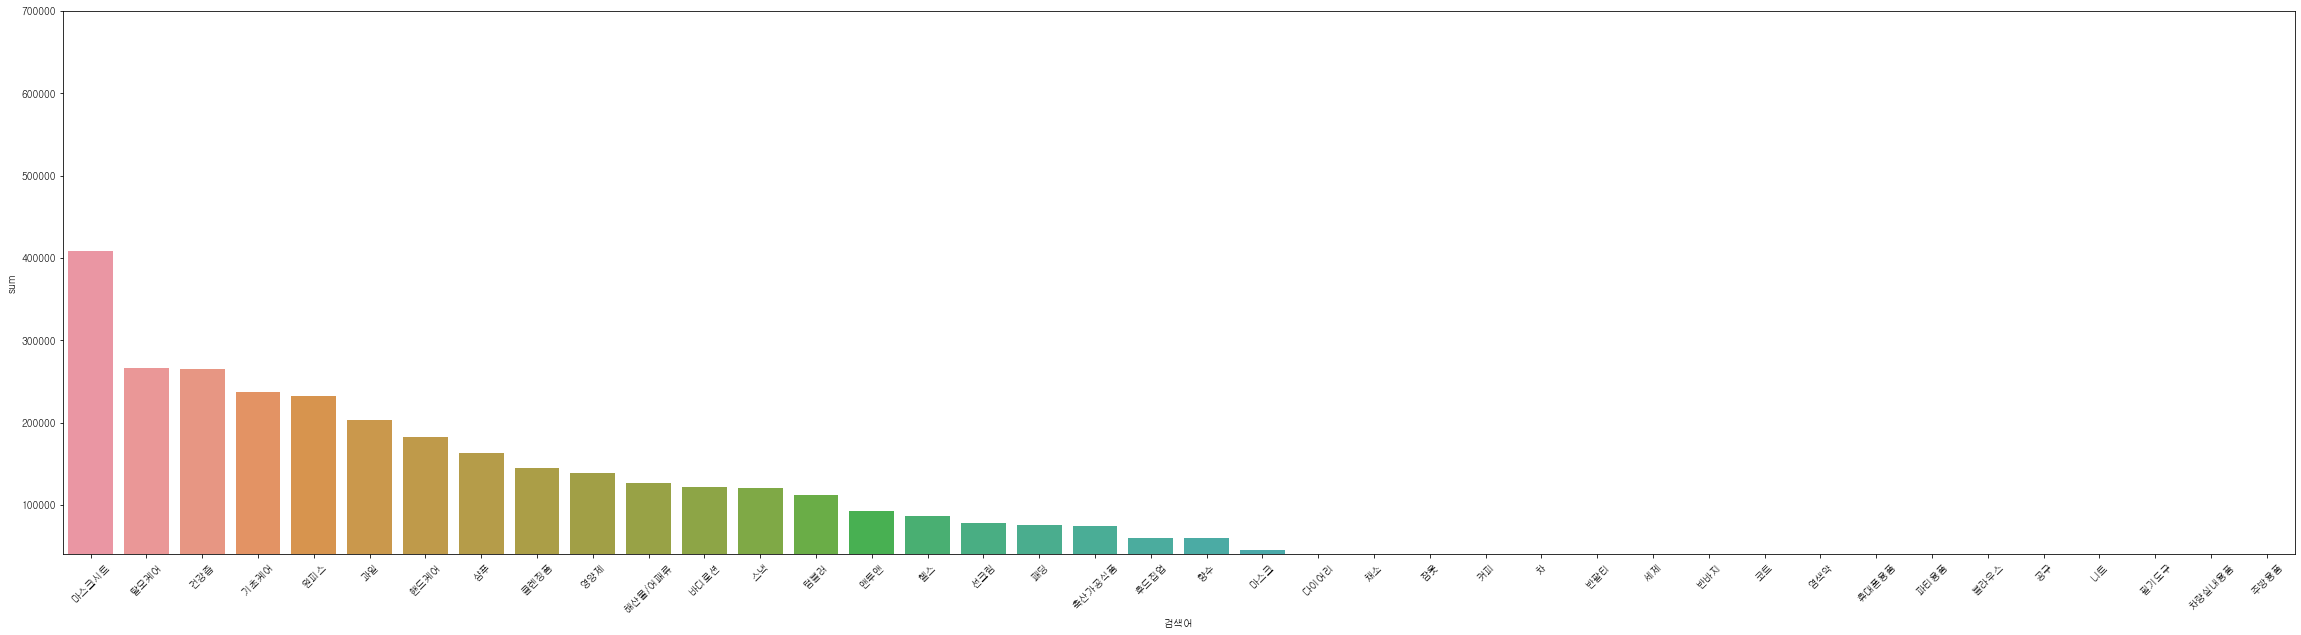

In [43]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (40,10))
plt.xticks(rotation = 45 )
sns.barplot(data=search , x=search.index , y='sum')
plt.ylim(40000,700000)
plt.xlim()
plt.show()

### 나이에 따른 검색횟수 비교

In [44]:
age = final_data.groupby(['나이'])['검색횟수'].aggregate(['sum'])
age = age.sort_values(by=['sum'], ascending=False)
age

,sum
나이,
40대,664711.98327
50대,639949.80739
10대,621507.15960
30대,608529.26636
20대,595469.78186
60대,539162.75823


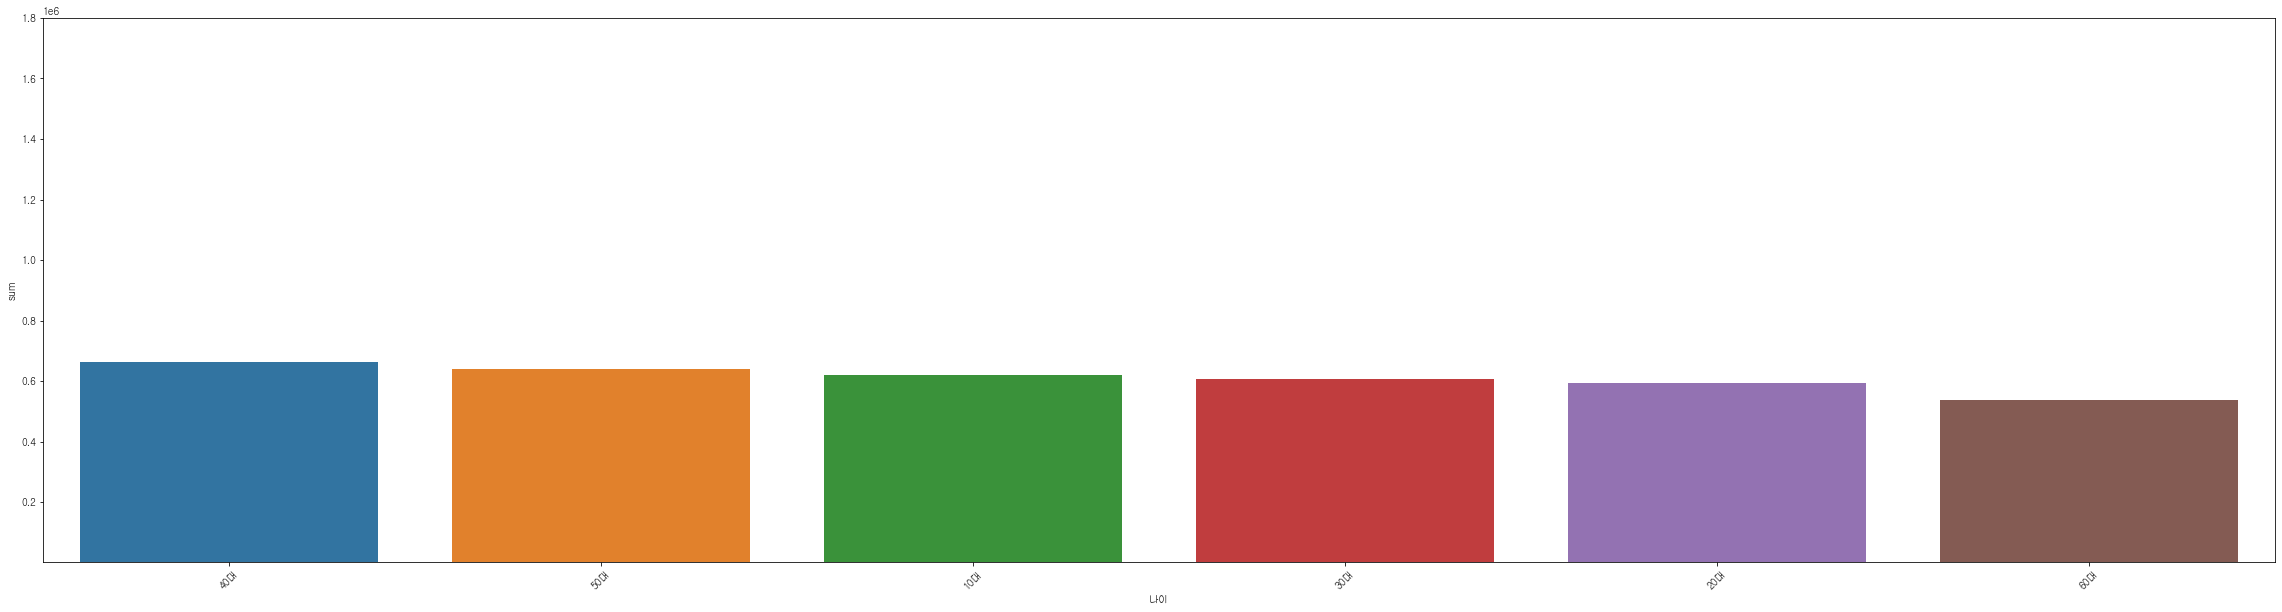

In [45]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (40,10))
plt.xticks(rotation = 45 )
sns.barplot(data=age , x=age.index , y='sum')
plt.ylim(4000,1800000)
plt.xlim()
plt.show()

### 성별에 따른 검색횟수 비교

In [46]:
gender = final_data.groupby(['성별'])['검색횟수'].aggregate(['sum'])
gender = gender.sort_values(by=['sum'], ascending=False)
gender

,sum
성별,
여,1.961089e+06
남,1.708242e+06


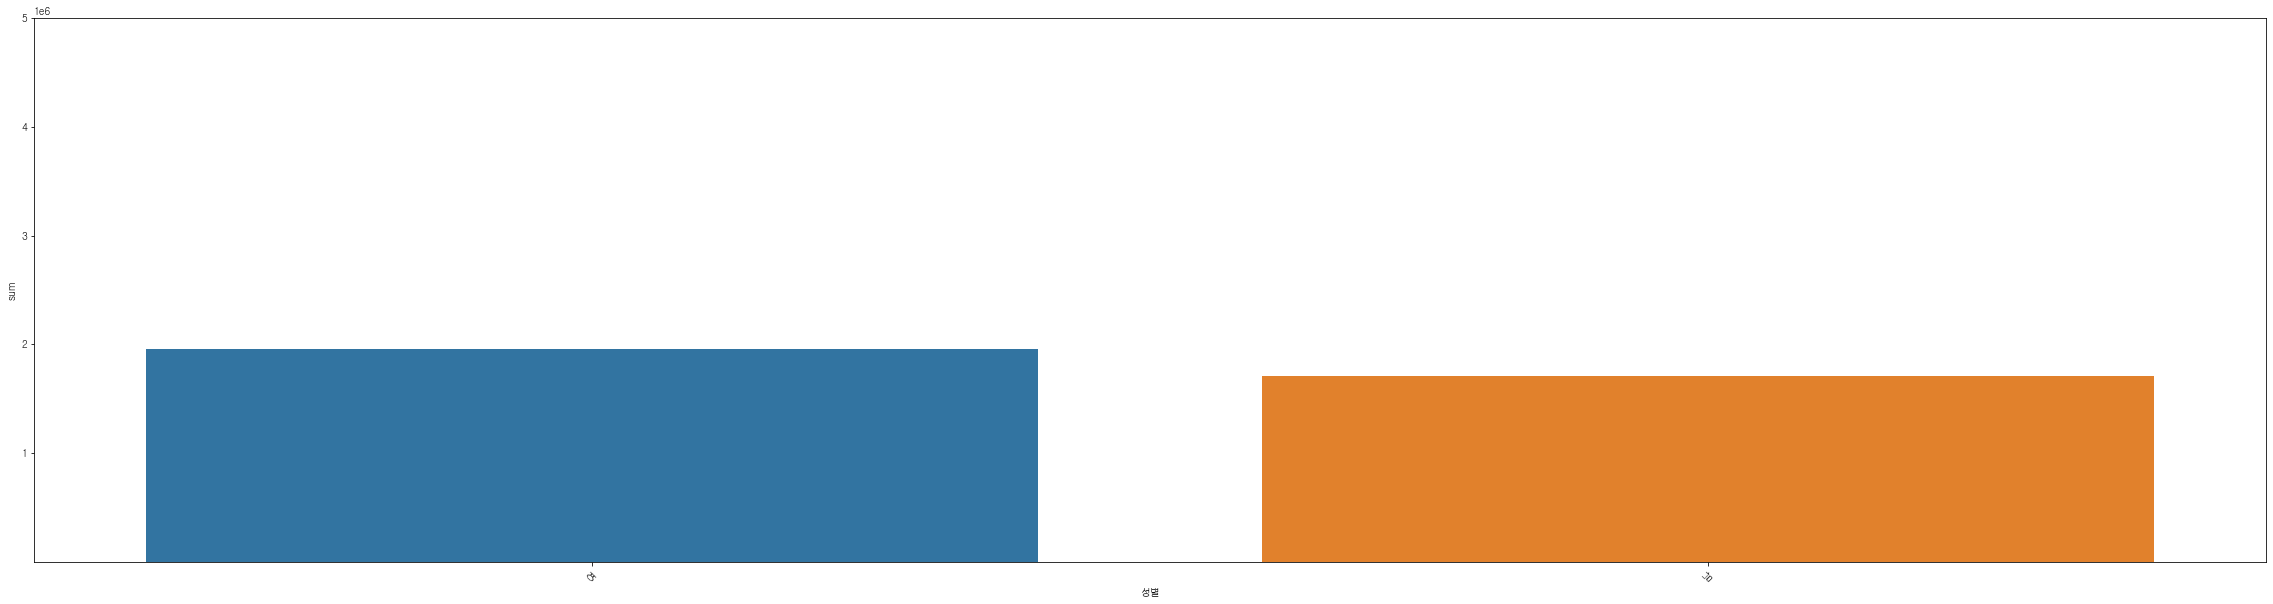

In [47]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (40,10))
plt.xticks(rotation = 45 )
sns.barplot(data=gender , x=gender.index , y='sum')
plt.ylim(2000,5000000)
plt.xlim()
plt.show()

### 기온에 따른 검색횟수 비교

In [48]:
temperature = final_data.groupby(['weighted_평균기온'])['검색횟수'].aggregate(['sum'])
temperature

,sum
weighted_평균기온,
-12.729,5579.94709
-11.582,5796.91027
-10.282,5794.39426
-8.135,5534.85762
-6.973,4710.31455
...,...
29.675,3776.95246
29.716,5350.47301
29.945,3771.47058


<AxesSubplot:xlabel='weighted_평균기온'>

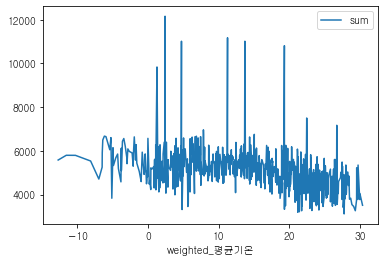

In [49]:
temperature.plot()

### 강수에 따른 검색횟수 비교

In [50]:
precipitation = final_data.groupby(['weighted_일강수량'])['검색횟수'].aggregate(['mean'])
precipitation

,mean
weighted_일강수량,
0.000,10.805074
0.001,9.198186
0.002,10.101436
0.003,10.447002
0.004,10.541000
...,...
59.308,10.179848
60.640,12.891574
68.133,10.485901


<AxesSubplot:xlabel='weighted_일강수량'>

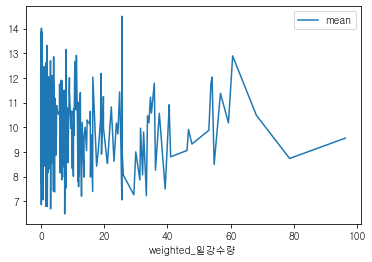

In [51]:
precipitation.plot()

### 풍속에 따른 검색횟수 비교

In [52]:
wind = final_data.groupby(['weighted_평균풍속'])['검색횟수'].aggregate(['sum'])
wind

,sum
weighted_평균풍속,
1.069,4941.74732
1.088,4341.33957
1.163,4519.64594
1.178,9323.83962
1.184,3759.47707
...,...
4.748,5773.67262
4.844,6187.95573
4.929,5911.23334


<AxesSubplot:xlabel='weighted_평균풍속'>

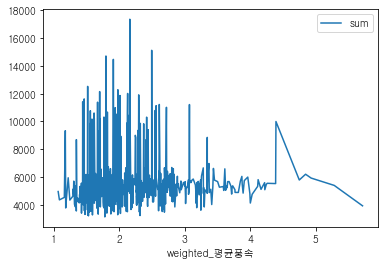

In [53]:
wind.plot()

### 습도에 따른 검색횟수 비교

In [54]:
humidity = final_data.groupby(['weighted_평균습도'])['검색횟수'].aggregate(['sum'])
humidity

,sum
weighted_평균습도,
33.991,5509.06416
34.963,5494.65979
35.355,5508.44254
36.118,4851.22590
36.168,5269.02636
...,...
94.134,5033.23260
94.776,4588.65864
95.258,4473.39063


<AxesSubplot:xlabel='weighted_평균습도'>

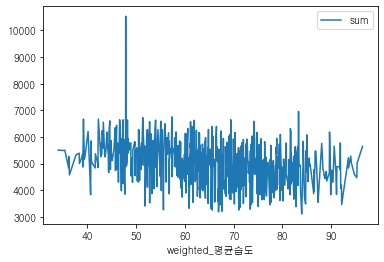

In [55]:
humidity.plot()

### 일조시간에 따른 검색횟수 비교

In [56]:
daylight= final_data.groupby(['weighted_일조시간'])['검색횟수'].aggregate(['sum'])
daylight

,sum
weighted_일조시간,
0.000,46753.34842
0.003,15069.82333
0.004,5288.07826
0.006,5656.93602
0.008,5156.47671
...,...
12.538,3981.36107
12.557,4938.65076
12.610,5330.20503


<AxesSubplot:xlabel='weighted_일조시간'>

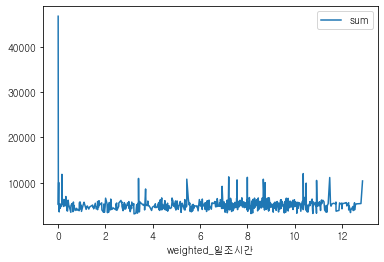

In [57]:
daylight.plot()

### 최심적설에 따른 검색횟수 비교

In [58]:
snow= final_data.groupby(['weighted_최심적설'])['검색횟수'].aggregate(['mean'])
snow

,mean
weighted_최심적설,
0.000,10.365352
0.009,7.981749
0.024,11.791267
0.058,12.753335
0.071,12.686431
0.075,12.195470
0.078,11.059469
0.150,9.735116
0.249,13.091922


<AxesSubplot:xlabel='weighted_최심적설'>

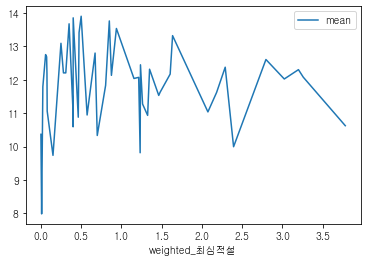

In [59]:
snow.plot()

## <상관관계 분석>

### spearman correlation 으로 날씨 요인과 상관관계가 높은 검색어 추출

In [60]:
# 검색어 기준으로 data 재생성
columns1 = final_data['검색어'].unique()

In [61]:
columns1

array(['영양제', '헬스', '과일', '커피', '차', '채소', '해산물/어패류', '건강즙', '스낵',
       '축산가공식품', '기초케어', '샴푸', '핸드케어', '바디로션', '선크림', '향수', '클렌징폼', '염색약',
       '마스크시트', '탈모케어', '니트', '맨투맨', '반바지', '반팔티', '블라우스', '원피스', '잠옷',
       '코트', '패딩', '후드집업', '마스크', '필기도구', '주방용품', '휴대폰용품', '차량실내용품',
       '파티용품', '텀블러', '다이어리', '공구', '세제'], dtype=object)

In [62]:
# spearman correlation 분석을 통해 날씨 요인과 상관관계가 높은 검색어 추출
from scipy.stats import spearmanr
data = pd.DataFrame(index = columns1,columns=['평균기온','일강수량','평균풍속','평균습도','일조시간','최심적설','sum'])
j = 0
for i in columns1:
    coef, p = spearmanr(final_data['검색횟수'].loc[(final_data['검색어']==i)],final_data['weighted_평균기온'].loc[(final_data['검색어']==i)])
    data['평균기온'][j]=abs(coef)
    coef, p = spearmanr(final_data['검색횟수'].loc[(final_data['검색어']==i)],final_data['weighted_일강수량'].loc[(final_data['검색어']==i)])
    data['일강수량'][j]=abs(coef)
    coef, p = spearmanr(final_data['검색횟수'].loc[(final_data['검색어']==i)],final_data['weighted_평균풍속'].loc[(final_data['검색어']==i)])
    data['평균풍속'][j]=abs(coef)
    coef, p = spearmanr(final_data['검색횟수'].loc[(final_data['검색어']==i)],final_data['weighted_평균습도'].loc[(final_data['검색어']==i)])
    data['평균습도'][j]=abs(coef)
    coef, p = spearmanr(final_data['검색횟수'].loc[(final_data['검색어']==i)],final_data['weighted_일조시간'].loc[(final_data['검색어']==i)])
    data['일조시간'][j]=abs(coef)
    coef, p = spearmanr(final_data['검색횟수'].loc[(final_data['검색어']==i)],final_data['weighted_최심적설'].loc[(final_data['검색어']==i)])
    data['최심적설'][j]=abs(coef)
    data['sum'][j]=data['평균기온'][j]+data['일강수량'][j]+data['평균풍속'][j]+data['평균습도'][j]+data['일조시간'][j]+data['최심적설'][j]
    j = j+1


In [63]:
data

,평균기온,일강수량,평균풍속,평균습도,일조시간,최심적설,sum
영양제,0.125335,0.041241,0.119158,0.072452,0.011052,0.075507,0.444744
헬스,0.057962,0.065597,0.118816,0.072836,0.062582,0.027602,0.405394
과일,0.218256,0.110149,0.037279,0.09002,0.001537,0.114048,0.571287
커피,0.06209,0.035968,0.095618,0.050624,0.030251,0.019857,0.294408
차,0.417926,0.138528,0.061414,0.217824,0.01725,0.141886,0.994828
채소,0.034409,0.014274,0.147673,0.057862,0.045321,0.051708,0.351247
해산물/어패류,0.055278,0.032018,0.114752,0.039316,0.020671,0.056879,0.318914
건강즙,0.038721,0.003132,0.015497,0.017576,0.020523,0.040313,0.135762
스낵,0.243983,0.019199,0.155888,0.108244,0.021099,0.160936,0.709348
축산가공식품,0.072981,0.007348,0.111374,0.042791,0.003366,0.071215,0.309074


In [64]:
# 순위로 나타냄
data['sum'].rank(ascending=False)

영양제        22.0
헬스         23.0
과일         19.0
커피         29.0
차          12.0
채소         25.0
해산물/어패류    27.0
건강즙        36.0
스낵         16.0
축산가공식품     28.0
기초케어        9.0
샴푸         30.0
핸드케어        4.0
바디로션        5.0
선크림        20.0
향수         31.0
클렌징폼       35.0
염색약        38.0
마스크시트      21.0
탈모케어       40.0
니트          2.0
맨투맨        10.0
반바지         1.0
반팔티         7.0
블라우스       17.0
원피스        13.0
잠옷          8.0
코트          6.0
패딩          3.0
후드집업       14.0
마스크        15.0
필기도구       18.0
주방용품       26.0
휴대폰용품      37.0
차량실내용품     39.0
파티용품       32.0
텀블러        33.0
다이어리       11.0
공구         24.0
세제         34.0
Name: sum, dtype: float64

### 정상/ 비정상 시계열 상품 중에서도 날씨 요인과 high/low 결정

In [126]:
#기온은 q2이상, 나머지 날씨요인은 q3이상이면 상관관계가 있다고 판단
기온q2=np.percentile(data['평균기온'],50)
강수q3=np.percentile(data['일강수량'],75)
풍속q3=np.percentile(data['평균풍속'],75)
습도q3=np.percentile(data['평균습도'],75)
#일조q3=np.percentile(data['일조시간'],75)
적설q3=np.percentile(data['최심적설'],75)

coro = data[(data['평균기온']>기온q2) | (data['일강수량']>강수q3) | (data['평균풍속']>풍속q3) | (data['평균습도']>습도q3) | (data['일조시간']>일조q3) | (data['최심적설']>적설q3)]
corx = data[(data['평균기온']<기온q2) & (data['일강수량']<강수q3) & (data['평균풍속']<풍속q3) & (data['평균습도']<습도q3) & (data['일조시간']<일조q3) & (data['최심적설']<적설q3)]

In [127]:
# 상관관계 low 
corx

,평균기온,일강수량,평균풍속,평균습도,일조시간,최심적설,sum
커피,0.06209,0.035968,0.095618,0.050624,0.030251,0.019857,0.294408
건강즙,0.038721,0.003132,0.015497,0.017576,0.020523,0.040313,0.135762
축산가공식품,0.072981,0.007348,0.111374,0.042791,0.003366,0.071215,0.309074
샴푸,0.080894,0.014547,0.062504,0.016073,0.020222,0.091893,0.286133
향수,0.124954,0.022188,0.028482,0.062764,0.002261,0.031027,0.271676
클렌징폼,0.027886,0.008968,0.04083,0.010271,0.010728,0.049562,0.148245
염색약,0.030092,0.008134,0.004193,0.005816,0.027384,0.046695,0.122314
마스크시트,0.139726,0.073182,0.087011,0.112971,0.057116,0.067706,0.537713
탈모케어,0.045162,0.035027,0.012318,0.010383,0.000986,0.004571,0.108447
주방용품,0.106923,0.021107,0.098131,0.045781,0.001864,0.061088,0.334895


In [128]:
#상관관계o
coro

,평균기온,일강수량,평균풍속,평균습도,일조시간,최심적설,sum
영양제,0.125335,0.041241,0.119158,0.072452,0.011052,0.075507,0.444744
헬스,0.057962,0.065597,0.118816,0.072836,0.062582,0.027602,0.405394
과일,0.218256,0.110149,0.037279,0.09002,0.001537,0.114048,0.571287
차,0.417926,0.138528,0.061414,0.217824,0.01725,0.141886,0.994828
채소,0.034409,0.014274,0.147673,0.057862,0.045321,0.051708,0.351247
해산물/어패류,0.055278,0.032018,0.114752,0.039316,0.020671,0.056879,0.318914
스낵,0.243983,0.019199,0.155888,0.108244,0.021099,0.160936,0.709348
기초케어,0.312675,0.09557,0.204229,0.208631,0.04754,0.19328,1.061925
핸드케어,0.466782,0.185134,0.076798,0.291783,0.054552,0.176513,1.251563
바디로션,0.449653,0.207635,0.054157,0.294264,0.07903,0.1566,1.24134


## <단위근 검정> - ADF

### 정상 시계열 상품/ 비정상 시계열 상품 구분

In [68]:
final_data

,날짜,분야,검색어,검색횟수,나이,성별,weighted_평균기온,weighted_일강수량,weighted_평균풍속,weighted_평균습도,weighted_일조시간,weighted_최심적설,Season
0,2019-06-01,식품,영양제,8.50328,10대,여,19.297,0.000,1.873,60.863,9.566,0.0,여름
1,2019-06-02,식품,영양제,11.75250,10대,여,21.342,0.000,1.679,47.685,12.483,0.0,여름
2,2019-06-03,식품,영양제,9.71310,10대,여,22.997,0.000,1.764,46.959,12.290,0.0,여름
3,2019-06-04,식품,영양제,7.77739,10대,여,23.428,0.000,1.972,56.793,12.538,0.0,여름
4,2019-06-05,식품,영양제,7.70826,10대,여,23.735,0.000,1.808,61.620,10.572,0.0,여름
...,...,...,...,...,...,...,...,...,...,...,...,...,...
350875,2021-05-27,생활건강,세제,1.14126,60대,남,16.495,5.006,2.597,79.689,2.446,0.0,봄
350876,2021-05-28,생활건강,세제,0.53258,60대,남,16.015,12.548,2.780,82.573,4.329,0.0,봄
350877,2021-05-29,생활건강,세제,0.63403,60대,남,17.115,0.177,2.339,71.781,7.477,0.0,봄
350878,2021-05-30,생활건강,세제,1.16662,60대,남,19.436,9.743,1.911,67.413,11.752,0.0,봄


In [69]:
#for example : 향수 -> 이런식으로 40번 반복함
final_data1 = final_data.loc[final_data['검색어']=='향수']

In [70]:
final_data1 = final_data1.groupby(by=['날짜']).sum()

In [71]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
    
    # target 값과 상관관계가 높은 열을 우선적으로 진행
    quantile_25 = np.percentile(df[column].values, 25)
    quantile_75 = np.percentile(df[column].values, 75)

    IQR = quantile_75 - quantile_25
    IQR_weight = IQR*weight
  
    lowest = quantile_25 - IQR_weight
    highest = quantile_75 + IQR_weight
  
    outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
    return outlier_idx

# 함수 사용해서 이상치 값 삭제
outlier_idx = get_outlier(df=final_data1, column='검색횟수', weight=1.5)
final_data1.drop(outlier_idx, axis=0, inplace=True)


No handles with labels found to put in legend.


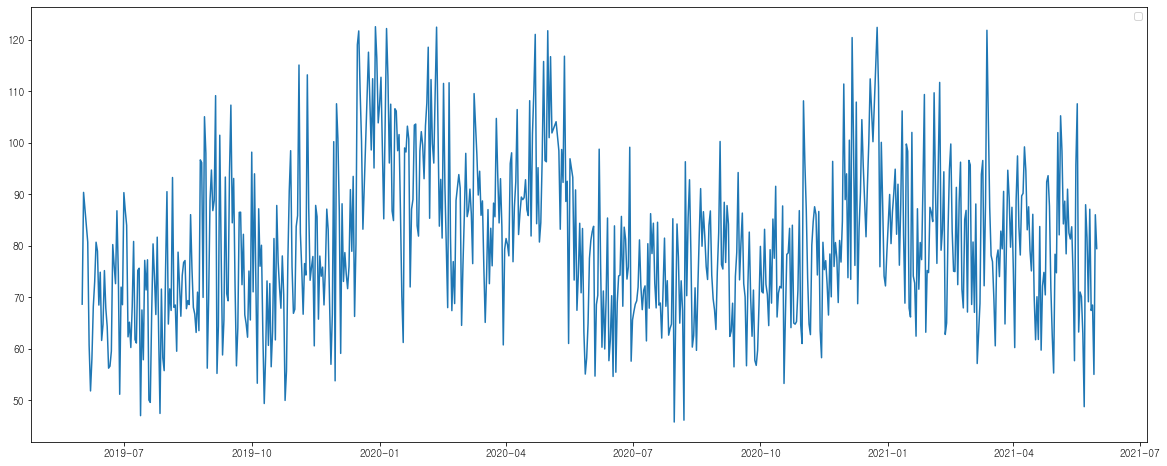

In [72]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))
plt.plot(final_data1['검색횟수'])
plt.legend()

In [73]:
grouped = final_data1['검색횟수']

In [74]:
grouped

날짜
2019-06-01    68.68877
2019-06-02    90.39873
2019-06-05    80.74615
2019-06-06    60.70503
2019-06-07    51.83867
                ...   
2021-05-27    67.46776
2021-05-28    68.52646
2021-05-29    55.05012
2021-05-30    86.06238
2021-05-31    79.48495
Name: 검색횟수, Length: 712, dtype: float64

In [75]:
# ADF < CV -> 정상 시계열
# P-value < 유의수준 0.05 -> 정상 시계열

from statsmodels.tsa.stattools import adfuller

def print_adfuller(inputSeries):
    result = adfuller(inputSeries)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

print_adfuller(grouped)
print("--------")

ADF Statistic: -4.516986
p-value: 0.000183
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569
--------


In [76]:
# 위의 코드를 반복하여 총 40개의 검색어를 분석한 결과
# 정상 시계열: 해산물/어패류, 건강즙, 향수, 클렌징폼, 필기도구, 후드집업, 맨투맨, 니트
# 비정상 시계열: 공구, 헬스, 텀블러, 파티용품, 염색약, 핸드케어, 반바지, 반팔티, 스낵, 다이어리, 마스크, 코트, 잠옷, 원피스, 기초케어, 마스크시트, 선크림, 바디로션, 채소, 과일, 영양제, 패딩, 차, 세제, 차량실내용품, 휴대폰용품, 주방용품, 탈모케어, 샴푸, 축산가공식품, 커피, 블라우스 


### 날씨 요인들의 정상/비정상 시계열 구분

In [77]:
#for example : 평균기온 -> 이런식으로 6번 반복함
grouped = final_data.groupby(by=['날짜']).sum()
grouped = grouped['weighted_평균기온']
from statsmodels.tsa.stattools import adfuller

def print_adfuller(inputSeries):
    result = adfuller(inputSeries)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

print_adfuller(grouped)
print("--------")

# 평균기온 = 비정상

ADF Statistic: -1.622162
p-value: 0.471596
Critical Values:
	1%: -3.439
	5%: -2.866
	10%: -2.569
--------


In [78]:
grouped = final_data.groupby(by=['날짜']).sum()
grouped = grouped['weighted_일강수량']
from statsmodels.tsa.stattools import adfuller

def print_adfuller(inputSeries):
    result = adfuller(inputSeries)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

print_adfuller(grouped)
print("--------")

# 일강수량 = 정상

ADF Statistic: -3.558165
p-value: 0.006613
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569
--------


In [79]:
grouped = final_data.groupby(by=['날짜']).sum()
grouped = grouped['weighted_평균풍속']
from statsmodels.tsa.stattools import adfuller

def print_adfuller(inputSeries):
    result = adfuller(inputSeries)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

print_adfuller(grouped)
print("--------")

# 평균풍속 = 정상

ADF Statistic: -10.832412
p-value: 0.000000
Critical Values:
	1%: -3.439
	5%: -2.866
	10%: -2.569
--------


In [80]:
grouped = final_data.groupby(by=['날짜']).sum()
grouped = grouped['weighted_평균습도']
from statsmodels.tsa.stattools import adfuller

def print_adfuller(inputSeries):
    result = adfuller(inputSeries)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

print_adfuller(grouped)
print("--------")

# 평균습도 = 비정상

ADF Statistic: -2.755544
p-value: 0.064910
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569
--------


In [81]:
grouped = final_data.groupby(by=['날짜']).sum()
grouped = grouped['weighted_일조시간']
from statsmodels.tsa.stattools import adfuller

def print_adfuller(inputSeries):
    result = adfuller(inputSeries)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

print_adfuller(grouped)
print("--------")

# 일조시간 = 정상

ADF Statistic: -8.260369
p-value: 0.000000
Critical Values:
	1%: -3.439
	5%: -2.866
	10%: -2.569
--------


In [82]:
grouped = final_data.groupby(by=['날짜']).sum()
grouped = grouped['weighted_최심적설']
from statsmodels.tsa.stattools import adfuller

def print_adfuller(inputSeries):
    result = adfuller(inputSeries)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

print_adfuller(grouped)
print("--------")

# 최심적설 = 정상

ADF Statistic: -3.318100
p-value: 0.014089
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569
--------


In [83]:
# 분석 결과
# 정상 시계열: 일강수량, 평균풍속, 일조시간, 최심적설
# 비정상 시계열: 평균기온, 평균습도

In [84]:
## 정상 high = 향수, 비정상 high = 핸드케어

## <인과관계 분석>

### 정상-정상 시계열 상품 (향수) 의 그랜저 인과관계 진행

In [85]:
# diff method 를 이용해서 비정상 시계열 날씨 요인 -> 정상 시계열로 1차 차분값 사용
final_data1 = final_data.loc[final_data['검색어']=='향수']
final_data1['weighted_평균기온']=final_data['weighted_평균기온'].diff()
final_data1['weighted_평균습도']=final_data['weighted_평균습도'].diff()
#final_data1['검색횟수']=final_data['검색횟수'].diff()
final_data1

C:\Users\82103\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\82103\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,날짜,분야,검색어,검색횟수,나이,성별,weighted_평균기온,weighted_일강수량,weighted_평균풍속,weighted_평균습도,weighted_일조시간,weighted_최심적설,Season
109650,2019-06-01,미용,향수,11.57894,10대,여,-1.165,0.000,1.873,-10.382,9.566,0.0,여름
109651,2019-06-02,미용,향수,14.73684,10대,여,2.045,0.000,1.679,-13.178,12.483,0.0,여름
109652,2019-06-03,미용,향수,23.15789,10대,여,1.655,0.000,1.764,-0.726,12.290,0.0,여름
109653,2019-06-04,미용,향수,14.73684,10대,여,0.431,0.000,1.972,9.834,12.538,0.0,여름
109654,2019-06-05,미용,향수,6.31578,10대,여,0.307,0.000,1.808,4.827,10.572,0.0,여름
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150581,2021-05-27,미용,향수,10.86956,60대,남,-1.461,5.006,2.597,24.029,2.446,0.0,봄
150582,2021-05-28,미용,향수,8.69565,60대,남,-0.480,12.548,2.780,2.884,4.329,0.0,봄
150583,2021-05-29,미용,향수,2.17391,60대,남,1.100,0.177,2.339,-10.792,7.477,0.0,봄
150584,2021-05-30,미용,향수,2.17391,60대,남,2.321,9.743,1.911,-4.368,11.752,0.0,봄


In [86]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
    
    # target 값과 상관관계가 높은 열을 우선적으로 진행
    quantile_25 = np.percentile(df[column].values, 25)
    quantile_75 = np.percentile(df[column].values, 75)

    IQR = quantile_75 - quantile_25
    IQR_weight = IQR*weight
  
    lowest = quantile_25 - IQR_weight
    highest = quantile_75 + IQR_weight
  
    outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
    return outlier_idx

# 함수 사용해서 이상치 값 삭제
outlier_idx = get_outlier(df=final_data1, column='검색횟수', weight=2.5)
final_data1.drop(outlier_idx, axis=0, inplace=True)
final_data1

C:\Users\82103\anaconda3\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,날짜,분야,검색어,검색횟수,나이,성별,weighted_평균기온,weighted_일강수량,weighted_평균풍속,weighted_평균습도,weighted_일조시간,weighted_최심적설,Season
109650,2019-06-01,미용,향수,11.57894,10대,여,-1.165,0.000,1.873,-10.382,9.566,0.0,여름
109651,2019-06-02,미용,향수,14.73684,10대,여,2.045,0.000,1.679,-13.178,12.483,0.0,여름
109653,2019-06-04,미용,향수,14.73684,10대,여,0.431,0.000,1.972,9.834,12.538,0.0,여름
109654,2019-06-05,미용,향수,6.31578,10대,여,0.307,0.000,1.808,4.827,10.572,0.0,여름
109655,2019-06-06,미용,향수,6.31578,10대,여,-1.927,12.837,1.544,13.305,1.958,0.0,여름
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150581,2021-05-27,미용,향수,10.86956,60대,남,-1.461,5.006,2.597,24.029,2.446,0.0,봄
150582,2021-05-28,미용,향수,8.69565,60대,남,-0.480,12.548,2.780,2.884,4.329,0.0,봄
150583,2021-05-29,미용,향수,2.17391,60대,남,1.100,0.177,2.339,-10.792,7.477,0.0,봄
150584,2021-05-30,미용,향수,2.17391,60대,남,2.321,9.743,1.911,-4.368,11.752,0.0,봄


In [87]:
# lag(시차)를 조정하며 AIC를 최소화 하는 최적 lag찾음
import statsmodels.api as sm
fit = sm.tsa.VAR(final_data1[['weighted_평균기온','weighted_일강수량','weighted_평균풍속','weighted_평균습도','weighted_일조시간','weighted_최심적설','검색횟수']]).fit(maxlags=8)
#,'weighted_일강수량','weighted_평균풍속','weighted_평균습도','weighted_일조시간','weighted_최심적설'
fit.summary()

C:\Users\82103\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:591: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 09, Dec, 2021
Time:                     02:24:17
--------------------------------------------------------------------
No. of Equations:         7.00000    BIC:                    9.87541
Nobs:                     8588.00    HQIC:                   9.65933
Log likelihood:          -125899.    FPE:                    14009.5
AIC:                      9.54749    Det(Omega_mle):         13375.5
--------------------------------------------------------------------
Results for equation weighted_평균기온
                      coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------
const                   -2.233406         0.166612          -13.405           0.000
L1.weighted_평균기온        -0.009201         0.011978           -0.768           0.442
L1.weighted_일강수량         0.014142       

### granger causality tests을 이용하여 향수에 유의미한 인과관계를 가지고있는 날씨요인을 추출

In [88]:
# VAR 분석에서 lag = 6 로 설정하고 분석 진행

import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests
print(grangercausalitytests(final_data1[['weighted_평균기온','검색횟수']], maxlag=6, addconst=True, verbose=True))

# 평균기온 -> 향수 : Causality


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.0962  , p=0.1477  , df_denom=8592, df_num=1
ssr based chi2 test:   chi2=2.0970  , p=0.1476  , df=1
likelihood ratio test: chi2=2.0967  , p=0.1476  , df=1
parameter F test:         F=2.0962  , p=0.1477  , df_denom=8592, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.6104  , p=0.1999  , df_denom=8589, df_num=2
ssr based chi2 test:   chi2=3.2226  , p=0.1996  , df=2
likelihood ratio test: chi2=3.2220  , p=0.1997  , df=2
parameter F test:         F=1.6104  , p=0.1999  , df_denom=8589, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.2305  , p=0.0825  , df_denom=8586, df_num=3
ssr based chi2 test:   chi2=6.6971  , p=0.0822  , df=3
likelihood ratio test: chi2=6.6944  , p=0.0823  , df=3
parameter F test:         F=2.2305  , p=0.0825  , df_denom=8586, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.6446  , p=0.

In [89]:
print(grangercausalitytests(final_data1[['weighted_일강수량','검색횟수']], maxlag=6, addconst=True, verbose=True))

# 일강수량 -> 향수 : None


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=8.0342  , p=0.0046  , df_denom=8592, df_num=1
ssr based chi2 test:   chi2=8.0370  , p=0.0046  , df=1
likelihood ratio test: chi2=8.0333  , p=0.0046  , df=1
parameter F test:         F=8.0342  , p=0.0046  , df_denom=8592, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.6923  , p=0.0034  , df_denom=8589, df_num=2
ssr based chi2 test:   chi2=11.3911 , p=0.0034  , df=2
likelihood ratio test: chi2=11.3836 , p=0.0034  , df=2
parameter F test:         F=5.6923  , p=0.0034  , df_denom=8589, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.3900  , p=0.0172  , df_denom=8586, df_num=3
ssr based chi2 test:   chi2=10.1783 , p=0.0171  , df=3
likelihood ratio test: chi2=10.1723 , p=0.0172  , df=3
parameter F test:         F=3.3900  , p=0.0172  , df_denom=8586, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.4234  , p=0.

In [90]:
print(grangercausalitytests(final_data1[['weighted_평균풍속','검색횟수']], maxlag=6, addconst=True, verbose=True))

# 평균풍속 -> 향수: Causality


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.4633  , p=0.0110  , df_denom=8592, df_num=1
ssr based chi2 test:   chi2=6.4656  , p=0.0110  , df=1
likelihood ratio test: chi2=6.4632  , p=0.0110  , df=1
parameter F test:         F=6.4633  , p=0.0110  , df_denom=8592, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.3179  , p=0.0134  , df_denom=8589, df_num=2
ssr based chi2 test:   chi2=8.6408  , p=0.0133  , df=2
likelihood ratio test: chi2=8.6365  , p=0.0133  , df=2
parameter F test:         F=4.3179  , p=0.0134  , df_denom=8589, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.6736  , p=0.0457  , df_denom=8586, df_num=3
ssr based chi2 test:   chi2=8.0273  , p=0.0455  , df=3
likelihood ratio test: chi2=8.0236  , p=0.0455  , df=3
parameter F test:         F=2.6736  , p=0.0457  , df_denom=8586, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.0985  , p=0.

In [91]:
print(grangercausalitytests(final_data1[['weighted_평균습도','검색횟수']], maxlag=6, addconst=True, verbose=True))

# 평균습도 -> 향수: Casuality


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.3903  , p=0.0362  , df_denom=8592, df_num=1
ssr based chi2 test:   chi2=4.3919  , p=0.0361  , df=1
likelihood ratio test: chi2=4.3907  , p=0.0361  , df=1
parameter F test:         F=4.3903  , p=0.0362  , df_denom=8592, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.0299  , p=0.1314  , df_denom=8589, df_num=2
ssr based chi2 test:   chi2=4.0622  , p=0.1312  , df=2
likelihood ratio test: chi2=4.0612  , p=0.1313  , df=2
parameter F test:         F=2.0299  , p=0.1314  , df_denom=8589, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=5.2834  , p=0.0012  , df_denom=8586, df_num=3
ssr based chi2 test:   chi2=15.8630 , p=0.0012  , df=3
likelihood ratio test: chi2=15.8484 , p=0.0012  , df=3
parameter F test:         F=5.2834  , p=0.0012  , df_denom=8586, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=4.1062  , p=0.

In [92]:
print(grangercausalitytests(final_data1[['weighted_일조시간','검색횟수']], maxlag=6, addconst=True, verbose=True))

# 일조시간 -> 향수 : Causality


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.0856  , p=0.0433  , df_denom=8592, df_num=1
ssr based chi2 test:   chi2=4.0870  , p=0.0432  , df=1
likelihood ratio test: chi2=4.0860  , p=0.0432  , df=1
parameter F test:         F=4.0856  , p=0.0433  , df_denom=8592, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.5192  , p=0.0806  , df_denom=8589, df_num=2
ssr based chi2 test:   chi2=5.0413  , p=0.0804  , df=2
likelihood ratio test: chi2=5.0398  , p=0.0805  , df=2
parameter F test:         F=2.5192  , p=0.0806  , df_denom=8589, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.4084  , p=0.0168  , df_denom=8586, df_num=3
ssr based chi2 test:   chi2=10.2334 , p=0.0167  , df=3
likelihood ratio test: chi2=10.2273 , p=0.0167  , df=3
parameter F test:         F=3.4084  , p=0.0168  , df_denom=8586, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.5878  , p=0.

In [93]:
print(grangercausalitytests(final_data1[['weighted_최심적설','검색횟수']], maxlag=6, addconst=True, verbose=True))

# 최심적설 -> 향수 : none


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.6721  , p=0.1022  , df_denom=8592, df_num=1
ssr based chi2 test:   chi2=2.6731  , p=0.1021  , df=1
likelihood ratio test: chi2=2.6726  , p=0.1021  , df=1
parameter F test:         F=2.6721  , p=0.1022  , df_denom=8592, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.3581  , p=0.2572  , df_denom=8589, df_num=2
ssr based chi2 test:   chi2=2.7177  , p=0.2570  , df=2
likelihood ratio test: chi2=2.7173  , p=0.2570  , df=2
parameter F test:         F=1.3581  , p=0.2572  , df_denom=8589, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5819  , p=0.6268  , df_denom=8586, df_num=3
ssr based chi2 test:   chi2=1.7471  , p=0.6265  , df=3
likelihood ratio test: chi2=1.7469  , p=0.6266  , df=3
parameter F test:         F=0.5819  , p=0.6268  , df_denom=8586, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.5700  , p=0.

In [94]:
# 즉, 향수는 
# 평균기온: Causality
# 일강수량: None
# 평균풍속: Causality
# 평균습도: Causality
# 일조시간: Causality
# 최심적설: None

## < LSTM >

In [629]:
#final_data1=final_data1[['날짜','weighted_평균기온','weighted_일강수량','weighted_평균풍속','weighted_최심적설','검색횟수']]

In [95]:
# data preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import datetime as dt
from datetime import datetime
import tensorflow.keras as keras
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard
%matplotlib inline

### 위에서 진행한 시각화 데이터를 바탕으로 40대 여성의 향수 검색량을 예측

In [96]:
final_data40 = final_data1.loc[final_data1['나이']=='40대']
final_data40 = final_data40.loc[final_data1['성별']=='여']
final_data40

,날짜,분야,검색어,검색횟수,나이,성별,weighted_평균기온,weighted_일강수량,weighted_평균풍속,weighted_평균습도,weighted_일조시간,weighted_최심적설,Season
120615,2019-06-01,미용,향수,5.0193,40대,여,-1.165,0.000,1.873,-10.382,9.566,0.0,여름
120616,2019-06-02,미용,향수,5.2767,40대,여,2.045,0.000,1.679,-13.178,12.483,0.0,여름
120617,2019-06-03,미용,향수,7.9794,40대,여,1.655,0.000,1.764,-0.726,12.290,0.0,여름
120618,2019-06-04,미용,향수,7.9794,40대,여,0.431,0.000,1.972,9.834,12.538,0.0,여름
120619,2019-06-05,미용,향수,4.8906,40대,여,0.307,0.000,1.808,4.827,10.572,0.0,여름
...,...,...,...,...,...,...,...,...,...,...,...,...,...
121341,2021-05-27,미용,향수,5.7915,40대,여,-1.461,5.006,2.597,24.029,2.446,0.0,봄
121342,2021-05-28,미용,향수,5.1480,40대,여,-0.480,12.548,2.780,2.884,4.329,0.0,봄
121343,2021-05-29,미용,향수,7.2072,40대,여,1.100,0.177,2.339,-10.792,7.477,0.0,봄
121344,2021-05-30,미용,향수,4.1184,40대,여,2.321,9.743,1.911,-4.368,11.752,0.0,봄


### 그랜저 인과관계를 바탕으로 향수의 검색량과 causality 한 날씨요인인 평균기온/평균풍속/평균습도/일조시간 feature selection

In [97]:
final_data40 = final_data40[['날짜','weighted_평균기온','weighted_평균풍속','weighted_평균습도','weighted_일조시간','검색횟수']]

In [98]:
final_data40.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 120615 to 121345
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   날짜             731 non-null    datetime64[ns]
 1   weighted_평균기온  731 non-null    float64       
 2   weighted_평균풍속  731 non-null    float64       
 3   weighted_평균습도  731 non-null    float64       
 4   weighted_일조시간  731 non-null    float64       
 5   검색횟수           731 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 40.0 KB


In [99]:
final_data40.columns

Index(['날짜', 'weighted_평균기온', 'weighted_평균풍속', 'weighted_평균습도',
       'weighted_일조시간', '검색횟수'],
      dtype='object')

In [100]:
final_data40.shape

(731, 6)

### 위에서 생성한 40대 여성의 향수 dataframe의 결측값 여부 확인

In [101]:
final_data40.isnull().sum()

날짜               0
weighted_평균기온    0
weighted_평균풍속    0
weighted_평균습도    0
weighted_일조시간    0
검색횟수             0
dtype: int64

### 분석을 위해 날짜를 datatime형식으로 바꿔준다.

In [102]:
from datetime import datetime, timedelta
from pandas import DataFrame
final_data40['날짜'] = pd.to_datetime(final_data40['날짜'], format="%Y-%m-%d")
final_data40

C:\Users\82103\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,날짜,weighted_평균기온,weighted_평균풍속,weighted_평균습도,weighted_일조시간,검색횟수
120615,2019-06-01,-1.165,1.873,-10.382,9.566,5.0193
120616,2019-06-02,2.045,1.679,-13.178,12.483,5.2767
120617,2019-06-03,1.655,1.764,-0.726,12.290,7.9794
120618,2019-06-04,0.431,1.972,9.834,12.538,7.9794
120619,2019-06-05,0.307,1.808,4.827,10.572,4.8906
...,...,...,...,...,...,...
121341,2021-05-27,-1.461,2.597,24.029,2.446,5.7915
121342,2021-05-28,-0.480,2.780,2.884,4.329,5.1480
121343,2021-05-29,1.100,2.339,-10.792,7.477,7.2072
121344,2021-05-30,2.321,1.911,-4.368,11.752,4.1184


### 변수 정의

In [104]:
#final_data1_timeindex = final_data1.set_index('날짜')
#final_data40으로부터 dataset_train_actual 구성

dataset_train_actual = final_data40.copy()

In [105]:
#dataset_train_actual의 timeindex는 '날짜' column

dataset_train_timeindex = dataset_train_actual.set_index('날짜')

In [106]:
dataset_train = dataset_train_actual.copy()

# 총 6개의 column 중 예측값에 사용할 열을 선택해준다.

cols = list(dataset_train)[1:6]
cols

['weighted_평균기온', 'weighted_평균풍속', 'weighted_평균습도', 'weighted_일조시간', '검색횟수']

In [107]:
# 시각화에 사용될 날짜를 추출해준다.

datelist_train = list(dataset_train['날짜'][0:731])
datelist_train = [date for date in datelist_train]

# training set에 사용될 data의 수와 열의 개수를 보여준다.
# 전체 timestamp에 사용될 data의 수는 다음과 같다.
# 예측에 사용될 column은 다음과 같다.

print('Training set shape == {}'.format(dataset_train.shape))
print('All timestamps == {}'.format(len(datelist_train)))
print('Featured selected: {}'.format(cols))

Training set shape == (731, 6)
All timestamps == 731
Featured selected: ['weighted_평균기온', 'weighted_평균풍속', 'weighted_평균습도', 'weighted_일조시간', '검색횟수']


In [108]:
len(datelist_train)

731

### data 변환

In [109]:
#data에서 쉼표를 모두 제거하고, 데이터를 matrix 형태로 변환한다.

dataset_train = dataset_train.reset_index()
dataset_train= dataset_train[cols].astype(str)
for i in cols:
    for j in range(0, len(dataset_train)):
        dataset_train[i][j] = dataset_train[i][j].replace(',', '')

dataset_train = dataset_train.astype(float)

# Using multiple features (predictors)
training_set = dataset_train.values

print('Shape of training set == {}.'.format(training_set.shape))
training_set

Shape of training set == (731, 5).


array([[ -1.165 ,   1.873 , -10.382 ,   9.566 ,   5.0193],
       [  2.045 ,   1.679 , -13.178 ,  12.483 ,   5.2767],
       [  1.655 ,   1.764 ,  -0.726 ,  12.29  ,   7.9794],
       ...,
       [  1.1   ,   2.339 , -10.792 ,   7.477 ,   7.2072],
       [  2.321 ,   1.911 ,  -4.368 ,  11.752 ,   4.1184],
       [  1.026 ,   1.82  ,   3.832 ,   4.884 ,   4.3758]])

In [110]:
#변환된 dataset_train은 다음과 같다.

dataset_train[cols]

,weighted_평균기온,weighted_평균풍속,weighted_평균습도,weighted_일조시간,검색횟수
0,-1.165,1.873,-10.382,9.566,5.0193
1,2.045,1.679,-13.178,12.483,5.2767
2,1.655,1.764,-0.726,12.290,7.9794
3,0.431,1.972,9.834,12.538,7.9794
4,0.307,1.808,4.827,10.572,4.8906
...,...,...,...,...,...
726,-1.461,2.597,24.029,2.446,5.7915
727,-0.480,2.780,2.884,4.329,5.1480
728,1.100,2.339,-10.792,7.477,7.2072
729,2.321,1.911,-4.368,11.752,4.1184


### Feature Scaling

In [111]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
training_set_scaled = training_set
sc = StandardScaler()
training_set_scaled[:,0:4] = sc.fit_transform(training_set[:,0:4])
training_set_scaled[:,4:5] = training_set[:,4:5]

training_set_scaled

array([[-0.53236385, -0.54304971, -0.96074462,  0.88692765,  5.0193    ],
       [ 0.93449276, -0.82529608, -1.21948493,  1.71227097,  5.2767    ],
       [ 0.75627654, -0.70163143, -0.06718364,  1.65766307,  7.9794    ],
       ...,
       [ 0.50266114,  0.13492353, -0.99868579,  0.29586072,  7.2072    ],
       [ 1.06061501, -0.48776434, -0.40421234,  1.50543999,  4.1184    ],
       [ 0.46884576, -0.62015825,  0.35461119, -0.43780923,  4.3758    ]])

### lstm 시점 설정을 해주고 train/test set 을 나눠준다.
#### 2년치 데이터 중 최근 3개월을 test 데이터로 활용

In [113]:
# 기존에 가지고 있는 6일간의 data를 가지고 다음날 1일 data를 예측하는 train/test 구성

from sklearn.model_selection import train_test_split

X_train = []
y_train = []

n_future = 1    # 우리가 예측하고 싶은 data 수
n_past = 6     # data를 예측하기 위해 사용할 기존 data 수

#y_train 에는 추출값인 '검색횟수'가 들어감

for i in range(n_past, len(training_set_scaled) - n_future +1):
    X_train.append(training_set_scaled[i - n_past:i, 0:dataset_train.shape[1]-1])
    y_train.append(training_set_scaled[i + n_future - 1:i + n_future, 4])

X_train, y_train = np.array(X_train), np.array(y_train)

# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.125, random_state=34,shuffle=False)

print('X_train shape == {}.'.format(X_train.shape))
print('y_train shape == {}.'.format(y_train.shape))
print('X_test shape == {}.'.format(X_test.shape))
print('y_test shape == {}.'.format(y_test.shape))

X_train shape == (634, 6, 4).
y_train shape == (634, 1).
X_test shape == (91, 6, 4).
y_test shape == (91, 1).


### LSTM 분석을 위한 Model을 생성한다.
- parameter 조정을 통해 최적의 parameter를 선정한다.

In [114]:
#PART 2. Create a model. Training Step #3. Building the LSTM based Neural Network
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=128, kernel_size=3,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 4]),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
  #tf.keras.layers.LSTM(128),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=False)),
  #tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(1),
  # tf.keras.layers.Dense(3,kernel_initializer=tf.initializers.zeros),
  tf.keras.layers.Lambda(lambda x: x * 200),
  #tf.keras.layers.Reshape([24, 3])
])
# lr_schedule = tf.keras.callbacks.LearningRateScheduler(
#     lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=['mse'])

C:\Users\82103\AppData\Roaming\Python\Python37\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [115]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, None, 128)         1664      
_________________________________________________________________
bidirectional (Bidirectional (None, None, 256)         263168    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               394240    
_________________________________________________________________
dense (Dense)                (None, 1)                 257       
_________________________________________________________________
lambda (Lambda)              (None, 1)                 0         
Total params: 659,329
Trainable params: 659,329
Non-trainable params: 0
_________________________________________________________________


### 모델 평가 결과

In [129]:
# 모델 평가에는 mse와 loss를 사용 
# epochs=100, validation_split=0.3
history = model.fit(X_train, y_train, epochs=100, validation_split=0.3)

Epoch 1/100
14/14 [==============================] - 18s 303ms/step - loss: 2.7431 - mse: 16.9956 - val_loss: 2.1931 - val_mse: 12.7606
Epoch 2/100
14/14 [==============================] - 0s 34ms/step - loss: 1.7985 - mse: 8.4043 - val_loss: 2.1150 - val_mse: 12.1317
Epoch 3/100
14/14 [==============================] - 0s 34ms/step - loss: 1.5858 - mse: 6.9078 - val_loss: 1.8850 - val_mse: 9.7136
Epoch 4/100
14/14 [==============================] - 0s 32ms/step - loss: 1.4004 - mse: 5.6953 - val_loss: 1.7383 - val_mse: 8.3685
Epoch 5/100
14/14 [==============================] - 0s 33ms/step - loss: 1.3233 - mse: 5.1663 - val_loss: 1.6865 - val_mse: 7.7725
Epoch 6/100
14/14 [==============================] - 0s 34ms/step - loss: 1.2345 - mse: 4.6301 - val_loss: 1.5451 - val_mse: 6.7926
Epoch 7/100
14/14 [==============================] - 0s 33ms/step - loss: 1.1887 - mse: 4.4625 - val_loss: 1.4899 - val_mse: 6.3514
Epoch 8/100
14/14 [==============================] - 0s 33ms/step - los

14/14 [==============================] - 0s 34ms/step - loss: 0.6627 - mse: 1.9421 - val_loss: 1.0865 - val_mse: 3.9281
Epoch 63/100
14/14 [==============================] - 0s 36ms/step - loss: 0.6303 - mse: 1.8039 - val_loss: 1.1403 - val_mse: 4.1639
Epoch 64/100
14/14 [==============================] - 0s 34ms/step - loss: 0.5986 - mse: 1.7392 - val_loss: 1.1191 - val_mse: 3.9863
Epoch 65/100
14/14 [==============================] - 0s 34ms/step - loss: 0.5757 - mse: 1.6381 - val_loss: 1.0774 - val_mse: 3.8352
Epoch 66/100
14/14 [==============================] - 0s 34ms/step - loss: 0.5906 - mse: 1.6865 - val_loss: 1.1003 - val_mse: 3.9864
Epoch 67/100
14/14 [==============================] - 0s 34ms/step - loss: 0.6871 - mse: 2.0493 - val_loss: 1.2380 - val_mse: 4.6907
Epoch 68/100
14/14 [==============================] - 0s 33ms/step - loss: 0.6377 - mse: 1.8628 - val_loss: 1.1661 - val_mse: 4.1889
Epoch 69/100
14/14 [==============================] - 0s 35ms/step - loss: 0.6557 

### 위에서 생성해준 model로 test data를 예측한다.

In [131]:
predictions_test = model.predict(X_test)

In [132]:
predictions_test

array([[4.709776 ],
       [5.3914766],
       [7.30139  ],
       [6.965024 ],
       [5.732785 ],
       [4.663384 ],
       [5.389455 ],
       [4.2029076],
       [3.587058 ],
       [4.8028073],
       [4.790925 ],
       [5.0449944],
       [5.1390357],
       [4.212252 ],
       [4.823605 ],
       [4.8250155],
       [4.746013 ],
       [5.6843376],
       [5.916148 ],
       [5.8880873],
       [5.3851724],
       [4.869599 ],
       [6.2325516],
       [5.947729 ],
       [5.717724 ],
       [4.4038625],
       [5.8526835],
       [6.119743 ],
       [4.3537083],
       [3.3743865],
       [4.5309434],
       [4.708158 ],
       [5.392406 ],
       [6.272041 ],
       [5.678211 ],
       [6.2103467],
       [7.3589363],
       [5.6705   ],
       [3.8872554],
       [3.984621 ],
       [3.5495706],
       [3.668932 ],
       [4.054863 ],
       [5.042787 ],
       [5.041386 ],
       [5.591069 ],
       [5.2328854],
       [4.911734 ],
       [4.262661 ],
       [4.153074 ],


## mse와 rmse를 통해 모델을 평가한다. 

In [135]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test,predictions_test))
print('mse:',mean_squared_error(y_test,predictions_test))
print('rmse:',rms)

mse: 3.44628892207572
rmse: 1.856418304713601


### 2년치 데이터 중 최근 3개월을 예측그래프로 나타내기 위한 date list를 생성해준다.

In [136]:
# 리스트 생성
datelist_future = pd.date_range(datelist_train[-92], periods=91, freq='1d').tolist()

datelist_future_ = []
for this_timestamp in datelist_future:
    datelist_future_.append(this_timestamp.date())

### 

### 생성된 test의 datelist 는 다음과 같다.

In [143]:
datelist_future_

[datetime.date(2021, 3, 1),
 datetime.date(2021, 3, 2),
 datetime.date(2021, 3, 3),
 datetime.date(2021, 3, 4),
 datetime.date(2021, 3, 5),
 datetime.date(2021, 3, 6),
 datetime.date(2021, 3, 7),
 datetime.date(2021, 3, 8),
 datetime.date(2021, 3, 9),
 datetime.date(2021, 3, 10),
 datetime.date(2021, 3, 11),
 datetime.date(2021, 3, 12),
 datetime.date(2021, 3, 13),
 datetime.date(2021, 3, 14),
 datetime.date(2021, 3, 15),
 datetime.date(2021, 3, 16),
 datetime.date(2021, 3, 17),
 datetime.date(2021, 3, 18),
 datetime.date(2021, 3, 19),
 datetime.date(2021, 3, 20),
 datetime.date(2021, 3, 21),
 datetime.date(2021, 3, 22),
 datetime.date(2021, 3, 23),
 datetime.date(2021, 3, 24),
 datetime.date(2021, 3, 25),
 datetime.date(2021, 3, 26),
 datetime.date(2021, 3, 27),
 datetime.date(2021, 3, 28),
 datetime.date(2021, 3, 29),
 datetime.date(2021, 3, 30),
 datetime.date(2021, 3, 31),
 datetime.date(2021, 4, 1),
 datetime.date(2021, 4, 2),
 datetime.date(2021, 4, 3),
 datetime.date(2021, 4, 4)

### 

In [144]:
y_pred_test = predictions_test

In [145]:
# Inverse the predictions to original measurements
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_test, columns=['검색횟수']).set_index(pd.Series(datelist_future))

### 예측 결과는 다음과 같다.

In [146]:
PREDICTIONS_FUTURE

,검색횟수
2021-03-01,4.709776
2021-03-02,5.391477
2021-03-03,7.301390
2021-03-04,6.965024
2021-03-05,5.732785
...,...
2021-05-26,4.884765
2021-05-27,5.904952
2021-05-28,5.863277
2021-05-29,5.751215


### 예측 결과를 그래프로 나타내면 다음과 같다.

Text(0, 0.5, 'search')

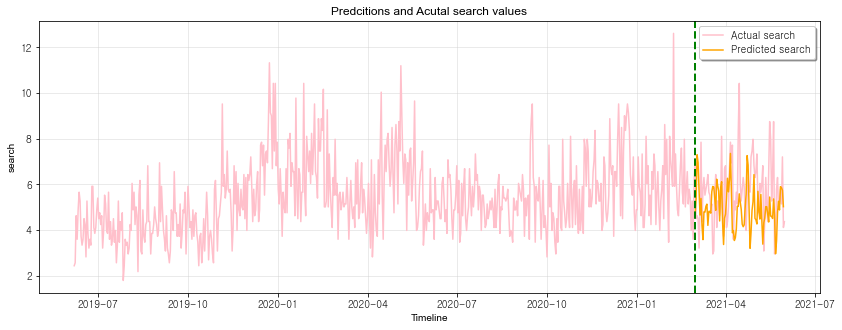

In [150]:
plt.rcParams['figure.figsize'] = 14, 5

START_DATE_FOR_PLOTTING = '2019-06-07'

plt.plot(dataset_train_timeindex.loc[START_DATE_FOR_PLOTTING:].index, dataset_train_timeindex.loc[START_DATE_FOR_PLOTTING:]['검색횟수'], color='pink', label='Actual search')
plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['검색횟수'], color='orange', label='Predicted search')
plt.axvline(x = min(PREDICTIONS_FUTURE.index), color='green', linewidth=2, linestyle='--')

plt.grid(which='major', color='#cccccc', alpha=0.5)

plt.legend(shadow=True)
plt.title('Predcitions and Acutal search values', family='Arial', fontsize=12)
plt.xlabel('Timeline', family='Arial', fontsize=10)
plt.ylabel('search', family='Arial', fontsize=10)